<a href="https://colab.research.google.com/github/Gazda70/DeepLearningInPython/blob/main/classic_machine_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive

In [ ]:
!unzip /content/emvic.zip

Archive:  /content/emvic.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/emvic.zip or
        /content/emvic.zip.zip, and cannot find /content/emvic.zip.ZIP, period.


In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#FILE="/content/gdrive/MyDrive/Lab2DLiP/emvic.data"
FILE="/content/emvic.data"

In [ ]:
df = pd.read_csv(FILE, sep='\t+', engine='python', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,a25,0,0,0,0,0,0,0,0,0,...,-20,-20,-20,-20,-19,-20,-22,-19,-22,-23
1,a25,0,0,0,0,0,0,0,0,0,...,-74,-73,-75,-73,-72,-72,-69,-67,-67,-70
2,a25,0,0,0,0,0,0,0,0,0,...,-51,-52,-54,-51,-54,-54,-54,-53,-52,-54
3,a25,0,0,0,0,0,0,0,0,0,...,74,74,74,74,74,74,75,71,76,74
4,a25,0,0,0,0,0,0,0,0,0,...,129,130,130,133,131,129,124,124,122,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,a41,0,0,0,0,0,0,0,0,0,...,83,81,80,82,80,82,82,80,81,79
412,a41,0,0,0,0,0,0,0,0,0,...,9,9,8,11,8,9,12,10,15,12
413,a41,0,0,0,0,0,0,0,0,0,...,223,223,222,223,225,227,230,229,227,226
414,a41,0,0,0,0,0,0,0,0,0,...,440,438,440,440,439,441,442,446,445,445


In [ ]:
# build the model
models = {
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB(),
    "TREE":DecisionTreeClassifier(),
    "RF":RandomForestClassifier(n_estimators=20),
    "SVM":SVC(gamma='scale'),
    "PERC":Perceptron(max_iter=2000),
    "GB":GradientBoostingClassifier()
}

In [ ]:
#get columns that have 0 in all rows
#print(df.loc[ : , [(df[col] == 0).all() for col in df.columns]])

#get columns that have only one unique value in all rows
#print(df.loc[ : , [df[col].nunique()==1 for col in df.columns]])
columns_to_remove = [col for col in df.columns if df[col].nunique()==1]
print(df.loc[ : , columns_to_remove])

     1     2     3     4     5     6     7     8     9     10    ...  4087  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
411     0     0     0     0     0     0     0     0     0     0  ...     0   
412     0     0     0     0     0     0     0     0     0     0  ...     0   
413     0     0     0     0     0     0     0     0     0     0  ...     0   
414     0     0     0     0     0     0     0     0     0     0  ...     0   
415     0     0     0     0     0     0     0     0     0     0  ...     0   

     4088  4089  4090  4091  4092  4093  4094  4095  4096  
0  

In [ ]:
#drop columns that only have one single value
clear_df = df.drop(df.columns[columns_to_remove], axis=1, inplace=False)
clear_df

,0,386,387,388,389,390,391,392,393,394,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,a25,0,0,0,2048,2048,2048,2048,2048,2048,...,-20,-20,-20,-20,-19,-20,-22,-19,-22,-23
1,a25,0,0,0,0,2048,2048,2048,2048,2048,...,-74,-73,-75,-73,-72,-72,-69,-67,-67,-70
2,a25,0,0,0,0,0,0,0,0,2048,...,-51,-52,-54,-51,-54,-54,-54,-53,-52,-54
3,a25,0,0,0,0,0,0,0,2048,2048,...,74,74,74,74,74,74,75,71,76,74
4,a25,0,0,2048,2048,2048,2048,2048,2048,2048,...,129,130,130,133,131,129,124,124,122,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,a41,0,0,0,0,0,0,2048,2048,2048,...,83,81,80,82,80,82,82,80,81,79
412,a41,0,0,0,0,0,2048,2048,2048,2048,...,9,9,8,11,8,9,12,10,15,12
413,a41,0,0,0,0,0,0,0,0,2048,...,223,223,222,223,225,227,230,229,227,226
414,a41,0,0,0,0,0,0,0,0,0,...,440,438,440,440,439,441,442,446,445,445


In [ ]:
labels = np.array(clear_df[0][:])
numeric_labels = np.array([float(label[1:]) for label in labels])

In [ ]:
samples = np.array(clear_df.loc[:, 1:len(clear_df.columns)])

In [ ]:
#split original DataFrame into training and testing sets
#train, test = train_test_split(clear_df, test_size=0.2, random_state=0)
(X_train, X_test, y_train, y_test) = train_test_split(samples, numeric_labels, test_size = .2)

In [ ]:
# try out k Nearest Neighbours classifier
model_name="KNN"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.32142857142857145

score
0.35714285714285715


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Linear Discriminant Analysis classifier
model_name="LDA"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.75

score
0.7738095238095238


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Gaussian Naive Bayes classifier
model_name="NB"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.5

score
0.5119047619047619


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Decision Tree classifier
model_name="TREE"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.47619047619047616

score
0.4880952380952381


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Random Forest classifier
model_name="RF"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.6547619047619048

score
0.7261904761904762


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Support Vector Machine classifier
model_name="SVM"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.5

score
0.5476190476190477


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
# try out Perceptron classifier
model_name="PERC"
model = models.get(model_name)
model.fit(X_train, y_train)
result = model.predict(X_test)
score = model.score(X_test, y_test)
print("score")
print(score)
#score 0.6190476190476191

score
0.6666666666666666


"\nplt.plot(np.arange(len(numeric_labels)), numeric_labels, color='green')\nplt.show()\nplt.plot(np.arange(len(result)), result, color='red')\nplt.show()\n"

In [ ]:
#Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
#Removing features with low variance
#var_thresh = VarianceThreshold(threshold=(.8 * (1 - .8)))
#var_thresh.fit_transform(samples)

#Univariate feature selection - statistical test
k_best = SelectKBest(f_regression, k=4000)
samples = k_best.fit_transform(samples, numeric_labels)

In [ ]:
#perform crossvalidation on three best classifiers - LDA, Random Forest and Perceptron

In [ ]:
model_name="LDA"
model = models.get(model_name)
scores = cross_val_score(model, samples, numeric_labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.02


In [ ]:
model_name="RF"
model = models.get(model_name)
scores = cross_val_score(model, samples, numeric_labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.05


In [ ]:
model_name="PERC"
model = models.get(model_name)
scores = cross_val_score(model, samples, numeric_labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.05


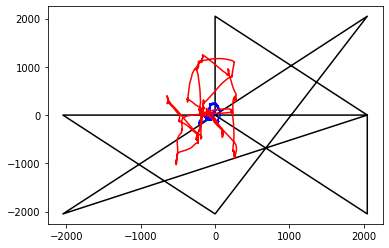

In [ ]:
#visualize eye movement
some_row = df.loc[0, :]
sx = np.append([0], some_row[1:2048])
sy = np.array(some_row[2048:4096])
lx = np.array(some_row[4096:6144])
rx = np.array(some_row[6144:8192])
ly = np.array(some_row[8192:10240])
ry = np.array(some_row[10240:12288])
plt.plot(sx, sy, color='black')
plt.plot(lx, ly, color='blue')
plt.plot(rx, ry, color='red')
plt.show()

In [ ]:
#optimization of best classifier
from sklearn import preprocessing as pr

print("clear_df")
print(clear_df)
#add column - difference between the right and left eye - use dataframe from before modifications
for column_number in range(0, 2048):
  clear_df[10000 + column_number] = df[df.columns[4096 + column_number]] - df[df.columns[6144 + column_number]]


for column_number in range(0, 2048):
  clear_df[20000 + column_number] = df[df.columns[8192 + column_number]] - df[df.columns[10240 + column_number]]

print(clear_df)

print("len(clear_df.columns)")
print(len(clear_df.columns))


samples = np.array(clear_df.loc[:, 1:len(clear_df.columns)])

#normalize samples
normalised_dataset = pr.normalize(samples, norm='l2')

#standardise samples
scaler = pr.StandardScaler()
scaler.fit(normalised_dataset)
standardised_dataset = scaler.transform(normalised_dataset)

model_name="LDA"
model = models.get(model_name)
scores = cross_val_score(model, standardised_dataset, numeric_labels, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clear_df
    0      386    387    388    389    390    391    392    393    394    ...  \
0     a25      0      0      0   2048   2048   2048   2048   2048   2048  ...   
1     a25      0      0      0      0   2048   2048   2048   2048   2048  ...   
2     a25      0      0      0      0      0      0      0      0   2048  ...   
3     a25      0      0      0      0      0      0      0   2048   2048  ...   
4     a25      0      0   2048   2048   2048   2048   2048   2048   2048  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
411   a41      0      0      0      0      0      0   2048   2048   2048  ...   
412   a41      0      0      0      0      0   2048   2048   2048   2048  ...   
413   a41      0      0      0      0      0      0      0      0   2048  ...   
414   a41      0      0      0      0      0      0      0      0      0  ...   
415   a41      0      0      0      0      0      0      0      0      0  ...   

     12279  12280 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


    0      386    387    388    389    390    391    392    393    394    ...  \
0     a25      0      0      0   2048   2048   2048   2048   2048   2048  ...   
1     a25      0      0      0      0   2048   2048   2048   2048   2048  ...   
2     a25      0      0      0      0      0      0      0      0   2048  ...   
3     a25      0      0      0      0      0      0      0   2048   2048  ...   
4     a25      0      0   2048   2048   2048   2048   2048   2048   2048  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
411   a41      0      0      0      0      0      0   2048   2048   2048  ...   
412   a41      0      0      0      0      0   2048   2048   2048   2048  ...   
413   a41      0      0      0      0      0      0      0      0   2048  ...   
414   a41      0      0      0      0      0      0      0      0      0  ...   
415   a41      0      0      0      0      0      0      0      0      0  ...   

     22038  22039  22040  2

In [ ]:
clear_df.to_csv('optimised_dataset.csv')